SAME FOR PROBLEM STATEMENT 18, 21 & 22

##**Step 1: Importing Required Libraries**

In [1]:
# Basic libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
import io

# Optional: Ensures plots display nicely in Jupyter/Colab
%matplotlib inline
sns.set(style="whitegrid")

##**Step 2: Load the Dataset**

In [2]:
# Objective: Load the Heart Disease dataset to explore and visualize its contents.

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))

# You can replace this with the actual path or URL of your dataset in jupyter.
# url = "path/to/the/dataset.csv"
# df = pd.read_csv(url)

# Display the first few rows
df.head()

Saving heart_FINAL.csv to heart_FINAL.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.0,125.0,212,0,1,168,0,1.0,2,2.0,3.0,0.0
1,53,1,0.0,140.0,203,1,0,NaN,1,3.1,0,0.0,3.0,0.0
2,70,1,0.0,145.0,NaN,0,1,125,1,2.6,0,0.0,3.0,0.0
3,61,1,0.0,148.0,203,0,1,161,0,0.0,2,1.0,3.0,0.0
4,62,0,0.0,138.0,294,1,1,106,0,NaN,1,3.0,2.0,NaN


##**a. HISTOGRAMS**


In [ ]:
# Drop all categorical columns (object or category dtype)
# df_numeric_only = df.select_dtypes(exclude=['object', 'category'])

# OR if you want to drop from the original DataFrame
# categorical_cols = df.select_dtypes(include=['object', 'category']).columns
# df = df.drop(columns=categorical_cols)

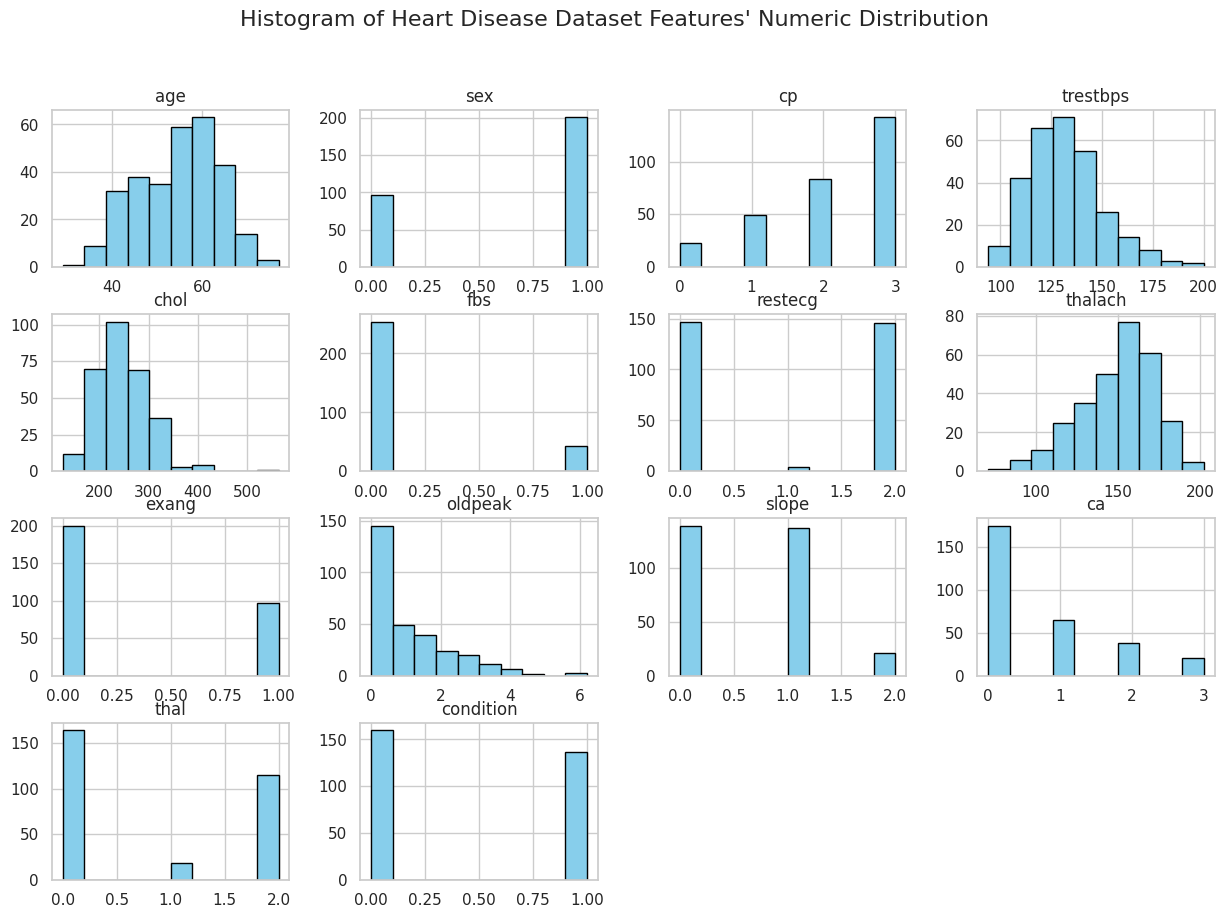

In [ ]:
# Objective: Understand the distribution of numeric variables.
# We'll use histograms to see how values are distributed across ranges for each variable.

df.hist(figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogram of Heart Disease Dataset Features' Numeric Distribution", fontsize=16)
plt.show()

##**b. SCATTER PLOTS**

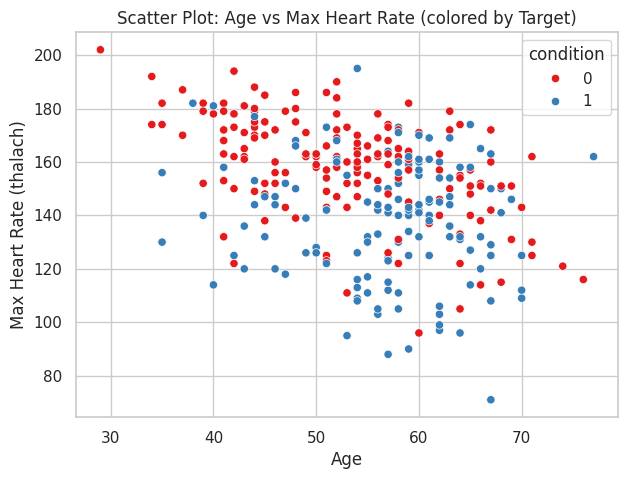

In [ ]:
# Objective: Explore relationships between two numerical variables. Can reveal trends, clusters, or correlations.

# Scatter plot between age and max heart rate
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='age', y='thalach', hue='condition', palette='Set1')
plt.title('Scatter Plot: Age vs Max Heart Rate (colored by Target)')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalach)')
plt.show()

##**c. DOT PLOTS (Strip Plots)**

Scatter plots refer to **any plot using dots** to represent individual data points, typically in 2 dimensions (x and y are both numeric).

Dot plots are a **subset of scatter plots** where the x-axis is usually categorical and y-axis is numeric.

In [8]:
df = df.apply(pd.to_numeric, errors='coerce')

for col in df.columns:
    if df[col].min() < 0:
        df = df[df[col] >= 0]

df.shape

(1014, 14)

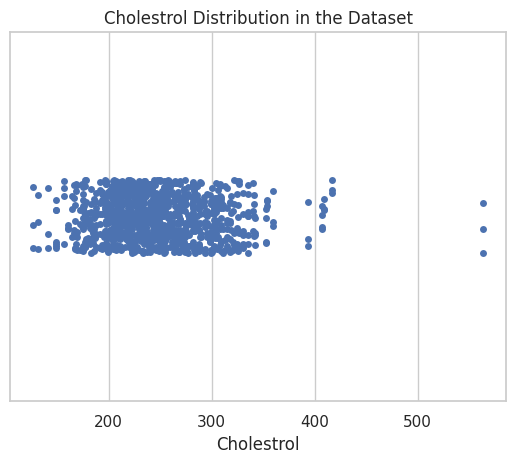

In [14]:
# Objective: Visualise individual data points to identify clustering or spread.
# Dot plots (strip plots) are good to observe value concentration per category.

# Example: Age distribution of patients with/without heart disease
sns.stripplot(data=df, x='chol', jitter=True)
plt.title('Cholestrol Distribution in the Dataset')
plt.xlabel('Cholestrol')
plt.show()


##**d. BAR PLOTS**

<ipython-input-22-7e8f1250eb3f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cp', palette='coolwarm')


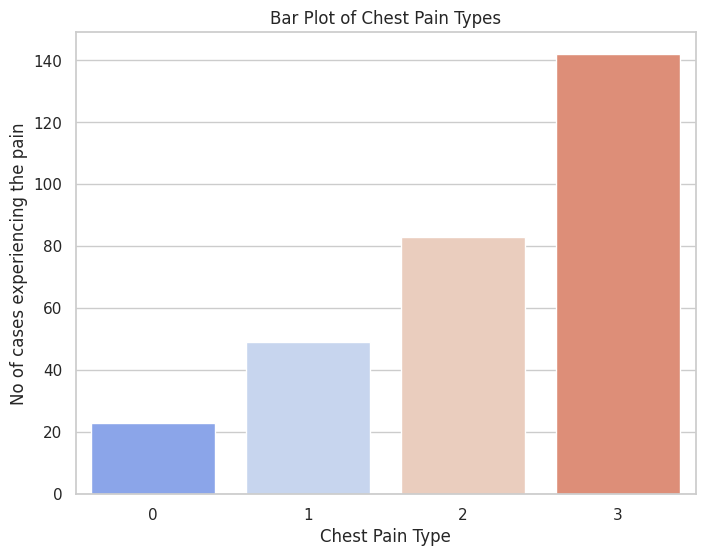

In [ ]:
# Objective: Show counts of categorical features or group averages.

# Example: Count of chest pain types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cp', palette='coolwarm')
plt.title('Bar Plot of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('No of cases experiencing the pain')
plt.show()

##**e. LINE CHARTS**

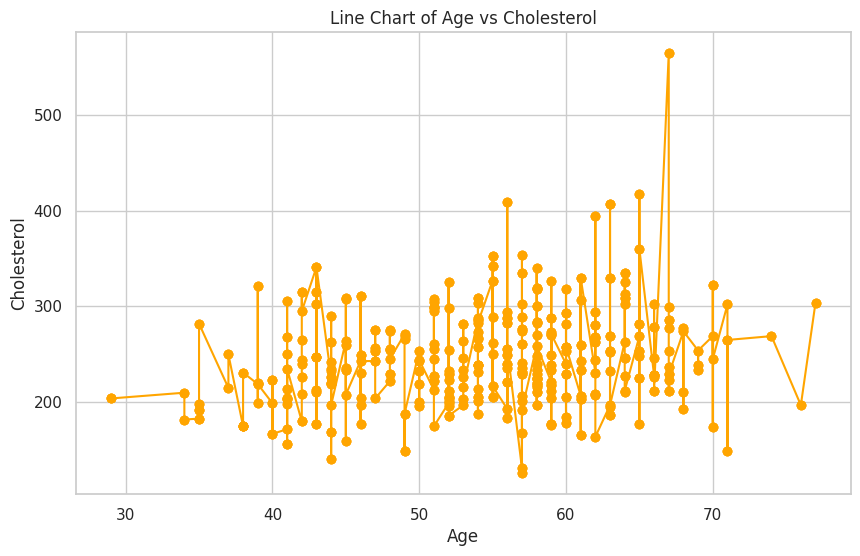

In [21]:
# Objective: Observe trend or progression. Line charts are typically used with time series,
# but we can simulate it for a sorted view (e.g., age vs cholesterol).

# Example: Age vs Cholesterol
df_sorted = df.sort_values(by='age')
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['age'], df_sorted['chol'], marker='o', color='orange')
plt.title('Line Chart of Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(True)
plt.show()

##**f. PIE CHART**

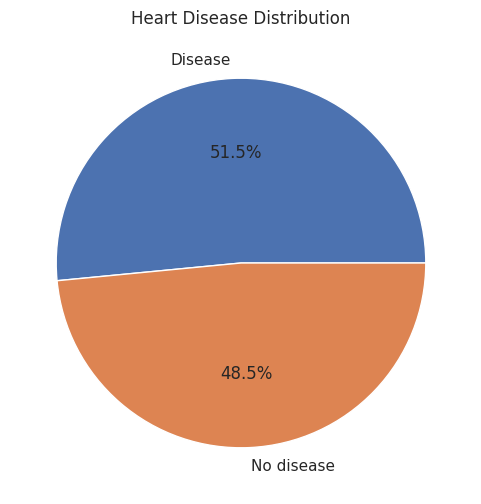

In [27]:
# Objective: Visualise class proportions (e.g. heart disease presence vs absence) to understand imbalance in the target.

# Pie chart for target variable
target_counts = df['target'].value_counts()
labels = ['Disease', 'No disease']


plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%')
plt.title('Heart Disease Distribution')
plt.show()


##**g. BOX PLOTS**

<ipython-input-17-cd373e30abc9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=df, palette='pastel')


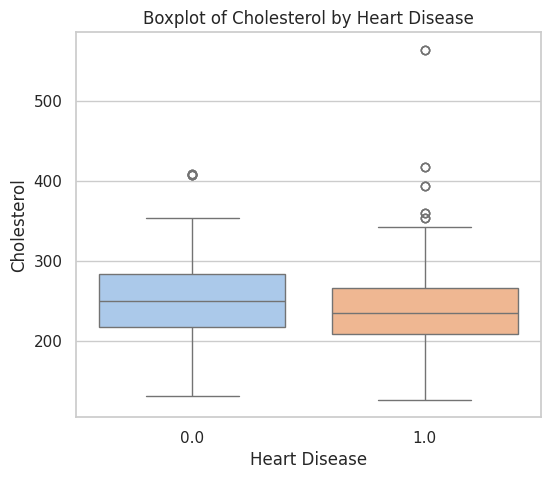

In [17]:
# Objective: Show the spread and outliers of continuous variables; helpful for identifying medians, IQR, and extreme values.

# Boxplot for cholesterol
plt.figure(figsize=(6, 5))
sns.boxplot(x='target', y='chol', data=df, palette='pastel')
plt.title('Boxplot of Cholesterol by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()

##**e. ADD HISTOGRAM AND SCATTER PLOT TO BOX PLOT**

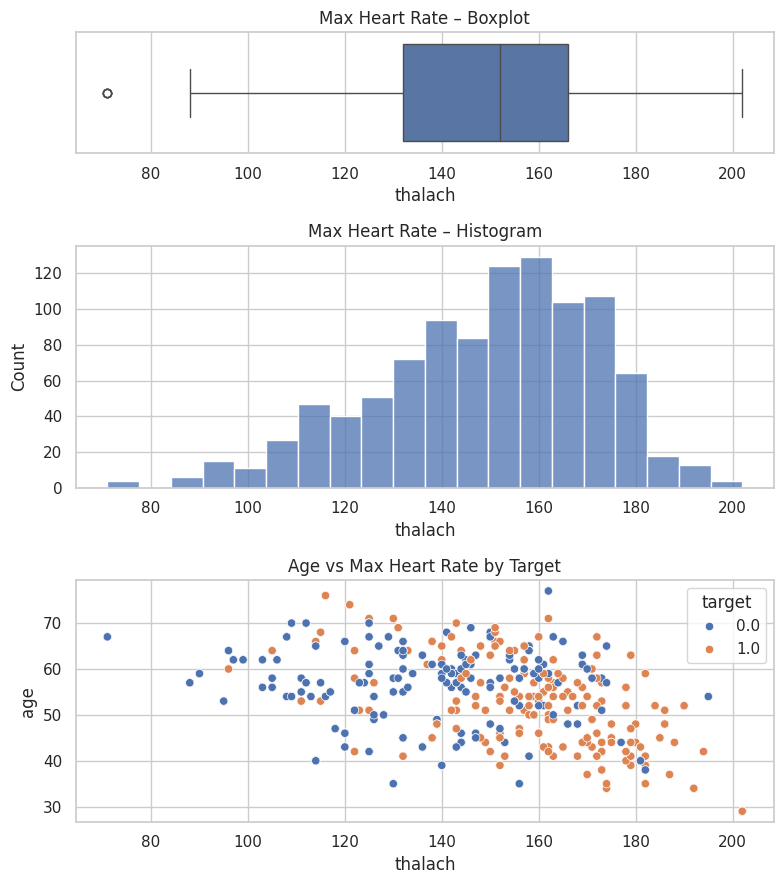

In [28]:
fig, ax = plt.subplots(3, 1, figsize=(8, 9), gridspec_kw={'height_ratios': [1, 2, 2]})

# Boxplot
sns.boxplot(x='thalach', data=df, ax=ax[0])
ax[0].set_title('Max Heart Rate – Boxplot')

# Histogram
sns.histplot(df['thalach'], ax=ax[1])
ax[1].set_title('Max Heart Rate – Histogram')

# Scatter plot (vs age, coloured by target)
sns.scatterplot(x='thalach', y='age', hue='target', data=df, ax=ax[2])
ax[2].set_title('Age vs Max Heart Rate by Target')

plt.tight_layout()
plt.show()


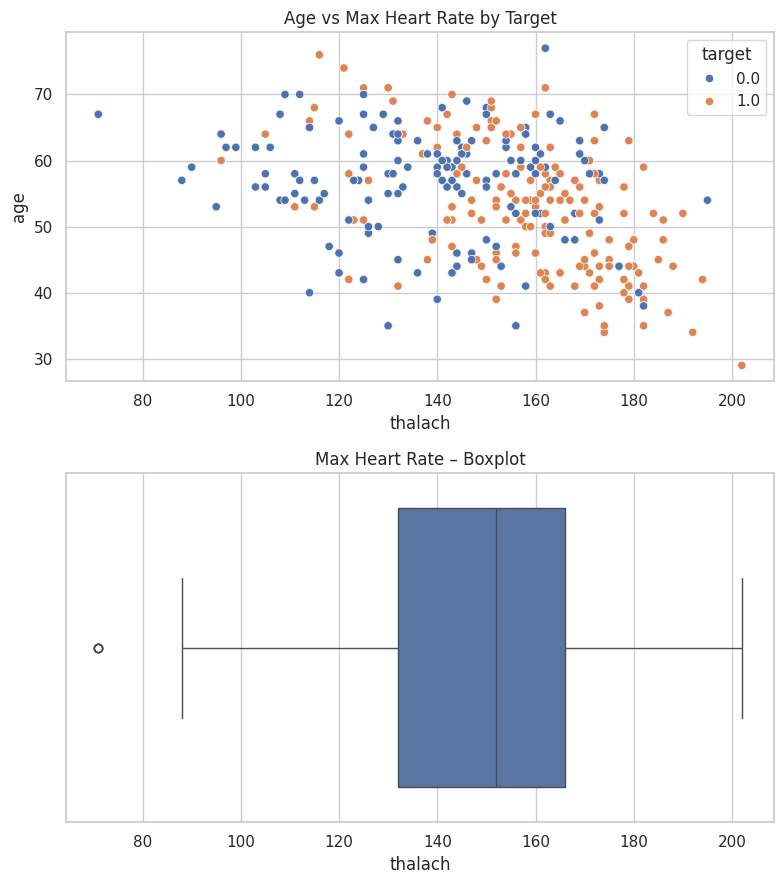

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(8, 9), gridspec_kw={'height_ratios': [1, 1]})

# Scatter plot (vs age, coloured by target)
sns.scatterplot(x='thalach', y='age', hue='target', data=df, ax=ax[0])
ax[0].set_title('Age vs Max Heart Rate by Target')

# Boxplot
sns.boxplot(x='thalach', data=df, ax=ax[1])
ax[1].set_title('Max Heart Rate – Boxplot')

plt.tight_layout()
plt.show()
